In [35]:
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import seaborn as sns

In [36]:
data = pd.read_csv('cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3618 entries, 0 to 3617
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3618 non-null   int64  
 1   Unnamed: 0.1   3618 non-null   int64  
 2   username       3618 non-null   object 
 3   description    3211 non-null   object 
 4   location       2186 non-null   object 
 5   following      3618 non-null   int64  
 6   followers      3618 non-null   int64  
 7   totaltweets    3618 non-null   int64  
 8   retweetcount   3618 non-null   int64  
 9   text           3618 non-null   object 
 10  hashtags       3618 non-null   object 
 11  time           3618 non-null   object 
 12  location_lat   1561 non-null   float64
 13  location_long  1561 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 395.8+ KB


Text(0, 0.5, 'Count')

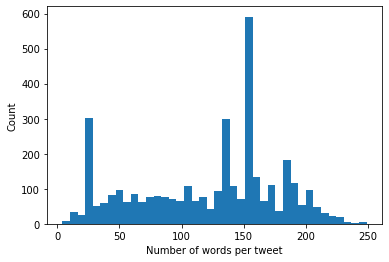

In [38]:
n_words_tweet = [len(t) for t in data['text']]
plt.hist(n_words_tweet, bins = 40)
plt.xlabel('Number of words per tweet')
plt.ylabel('Count')

In [39]:
mean_word_length_tweet = data['text'].str.split().apply(lambda x : [len(i) for i in x]). \
                          map(lambda x: np.mean(x))

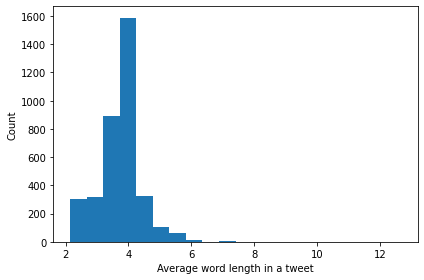

In [41]:
mean_word_length_tweet.hist(grid = False, bins = 20)
plt.xlabel('Average word length in a tweet')
plt.ylabel('Count')
plt.tight_layout()

In [43]:
corpus=[]
tweets = data['text'].str.split()
tweets = tweets.values.tolist()
corpus=[word.lower() for i in tweets for word in i if word !='/><br' and word != 'br']

Text(0.5, 15.0, 'word frequency')

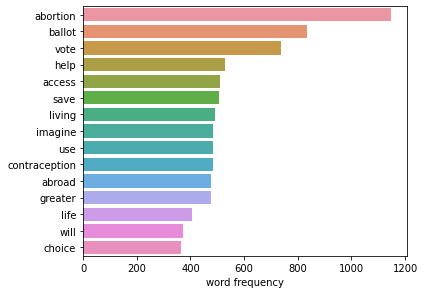

In [48]:
counter = Counter(corpus)
most = counter.most_common()
x, y= [], []

# number of most frequent word will plot
n_freq = 15

for word,count in most[:200]:
    # filtering STOPWORDS and , ' . marks
    if (word not in STOPWORDS) and len(word) > 2:
        x.append(word)
        y.append(count)
    if len(x) == n_freq:
      break
        
sns.barplot(x=y,y=x)
plt.tight_layout()
plt.xlabel('word frequency')

In [50]:
all_tweets = " ".join([''.join(c) for c in corpus])

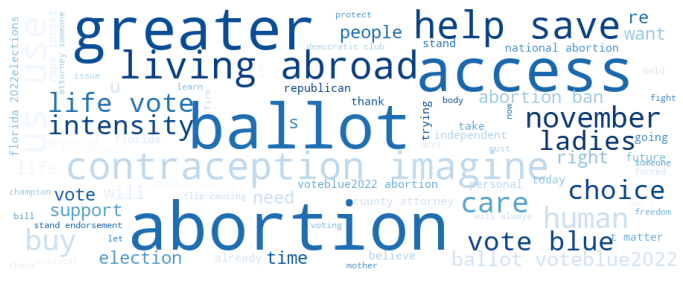

In [53]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      max_words=200,
                      max_font_size=30,
                      scale=3,
                      width = 300, height = 120,
                      random_state=1,
                      
                      colormap='Blues',

                     background_color='white')
wordcloud=wordcloud.generate(all_tweets)
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [54]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 

def sentiment_scores(threshold, sentence):
    sid_obj = SentimentIntensityAnalyzer()
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    # print("Overall sentiment dictionary is : ", sentiment_dict)
    # print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    # print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    # print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= threshold :
        return 1
    elif sentiment_dict['compound'] <= - threshold :
        return -1
    else :
        return 0

In [63]:
# parameter for the cut of pos/neg/neu
threshold = 0.05

In [65]:
# test
print('sentiment:', sentiment_scores(threshold, 'I am sad today'))
print('sentiment:', sentiment_scores(threshold, 'I am alright'))
print('sentiment:', sentiment_scores(threshold, 'It is raining'))

sentiment: -1
sentiment: 1
sentiment: 0


In [72]:
sentiment_class = []
for tweet in data['text']:
  sentiment_class.append(sentiment_scores(threshold, tweet))

In [73]:
counter_sent = Counter(sentiment_class)

In [74]:
counter_sent

Counter({1: 1789, 0: 970, -1: 859})

([<matplotlib.axis.XTick at 0x7f9cea0a7990>,
 [Text(0, 0, 'negative'), Text(0, 0, 'neutral'), Text(0, 0, 'positive')])

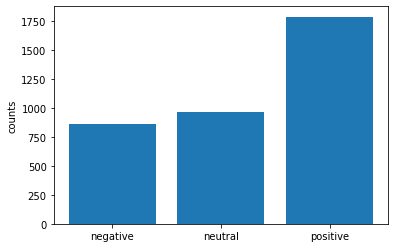

In [75]:
plt.bar(counter_sent.keys(), counter_sent.values())
plt.ylabel('counts')
plt.xticks(np.linspace(-1, 1, 3), ['negative', 'neutral', 'positive'])


In [82]:
np.array(list(counter_sent.values()))

array([1789,  970,  859])

([<matplotlib.axis.XTick at 0x7f9cf6000ed0>,
 [Text(0, 0, 'negative'), Text(0, 0, 'neutral'), Text(0, 0, 'positive')])

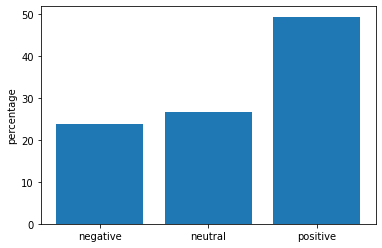

In [85]:
plt.bar(counter_sent.keys(), \
        np.array(list(counter_sent.values())/sum(np.array(list(counter_sent.values()))))*100)
plt.ylabel('percentage')
plt.xticks(np.linspace(-1, 1, 3), ['negative', 'neutral', 'positive'])

In [86]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import plotly
import plotly.express as px

In [97]:
fig = px.scatter_geo(
    data, 
    lat="location_lat", 
    lon="location_long", 
    projection="natural earth"
    )

fig.show()